In [1]:
import pandas as pd
import pyarrow
import numpy as np

In [27]:
gr_ratings_languages_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/gr-item-rating-language.parquet',
    engine='pyarrow')
gr_ratings_languages_df

,user,item,rating,deduced_language
0,1,400625995,3,ambiguous
1,1,400033362,4,other-translated
2,1,400985244,2,other-translated
3,1,450247128,5,other-translated
4,1,447250922,4,other-translated
...,...,...,...,...
104028924,876145,403410520,3,unknown
104028925,876145,404812169,4,other-translation-not-found
104028926,876145,421956106,3,other-translation-not-found
104028927,876145,413086736,4,unknown


In [2]:
work_ratings_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-work-ratings.parquet',
    engine='pyarrow')
work_ratings_df

,user,item,rating,last_rating,first_time,last_time,nratings
0,1,400625995,3.0,3.0,1501432064,1501432064,1
1,1,400033362,4.0,4.0,1495825408,1495825408,1
2,1,400985244,2.0,2.0,1490208512,1490208512,1
3,1,450247128,5.0,5.0,1488877696,1488877696,1
4,1,447250922,4.0,4.0,1482852608,1482852608,1
...,...,...,...,...,...,...,...
104028924,876145,403410520,3.0,3.0,1366579328,1366579328,1
104028925,876145,404812169,4.0,4.0,1366579328,1366579328,1
104028926,876145,421956106,3.0,3.0,1366579328,1366579328,1
104028927,876145,413086736,4.0,4.0,1367538688,1367538688,1


In [13]:
# remove users with unknown values
users_with_unknown = gr_ratings_languages_df[gr_ratings_languages_df['deduced_language'] == 'unknown']['user'].unique()
ratings_df = work_ratings_df[~work_ratings_df['user'].isin(users_with_unknown)]
ratings_df

,user,item,rating,last_rating,first_time,last_time,nratings
146,3,402139491,3.0,3.0,1405782272,1405782272,1
147,3,403301398,4.0,4.0,1394107264,1394107264,1
148,3,407350661,4.0,4.0,1394060800,1394060800,1
149,3,414638927,4.0,4.0,1351256064,1351256064,1
150,3,401734665,3.0,3.0,1260405120,1260405120,1
...,...,...,...,...,...,...,...
104028902,876143,400517040,4.0,4.0,1353167360,1353167360,1
104028903,876143,400816449,5.0,5.0,1343690112,1343690112,1
104028904,876143,403275794,5.0,5.0,1338858880,1338858880,1
104028905,876143,403295919,5.0,5.0,1338859136,1338859136,1


In [28]:
ratings_df = ratings_df[['user', 'item', 'rating', 'last_time']]
ratings_df

,user,item,rating,last_time
184,4,406374255,3.0,1382270080
185,4,418979356,4.0,1382270080
186,4,406996712,3.0,1361418752
187,4,403214749,4.0,1354509568
188,4,409585076,5.0,1341885952
...,...,...,...,...
104028225,876045,403214266,5.0,1365136640
104028226,876045,418034963,3.0,1364809344
104028227,876045,400122831,5.0,1364808960
104028228,876045,400846981,5.0,1364807680


In [4]:
gr_ratings_languages_df = gr_ratings_languages_df[['item', 'deduced_language']].drop_duplicates(subset=['item'])
gr_ratings_languages_df

NameError: name 'gr_ratings_languages_df' is not defined

In [25]:
# remove items with less than 20 ratings
item_counts = ratings_df['item'].value_counts()
items_to_keep = item_counts[item_counts >= 20].index
ratings_df = ratings_df[ratings_df['item'].isin(items_to_keep)]
ratings_df

,user,item,rating,last_time
184,4,406374255,3.0,1382270080
185,4,418979356,4.0,1382270080
186,4,406996712,3.0,1361418752
187,4,403214749,4.0,1354509568
188,4,409585076,5.0,1341885952
...,...,...,...,...
104028225,876045,403214266,5.0,1365136640
104028226,876045,418034963,3.0,1364809344
104028227,876045,400122831,5.0,1364808960
104028228,876045,400846981,5.0,1364807680


In [27]:
# keep users with more than 20 ratings
user_counts = ratings_df['user'].value_counts()
filtered_users = user_counts[user_counts >= 20].index
ratings_df = ratings_df[ratings_df['user'].isin(filtered_users)]
ratings_df

,user,item,rating,last_rating,first_time,last_time,nratings
184,4,406374255,3.0,3.0,1382270080,1382270080,1
185,4,418979356,4.0,4.0,1382270080,1382270080,1
186,4,406996712,3.0,3.0,1361418752,1361418752,1
187,4,403214749,4.0,4.0,1354509568,1354509568,1
188,4,409585076,5.0,5.0,1341885952,1341885952,1
...,...,...,...,...,...,...,...
104028225,876045,403214266,5.0,5.0,1365136640,1365136640,1
104028226,876045,418034963,3.0,3.0,1364809344,1364809344,1
104028227,876045,400122831,5.0,5.0,1364808960,1364808960,1
104028228,876045,400846981,5.0,5.0,1364807680,1364807680,1


In [29]:
# convert ratings to binary
ratings_df['rating'] = (ratings_df['rating'] >= 3).astype(int)
ratings_df

/tmp/ipykernel_3868/3959838055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['rating'] = (ratings_df['rating'] >= 3).astype(int)


,user,item,rating,last_time
184,4,406374255,1,1382270080
185,4,418979356,1,1382270080
186,4,406996712,1,1361418752
187,4,403214749,1,1354509568
188,4,409585076,1,1341885952
...,...,...,...,...
104028225,876045,403214266,1,1365136640
104028226,876045,418034963,1,1364809344
104028227,876045,400122831,1,1364808960
104028228,876045,400846981,1,1364807680


In [30]:
# save so that ratings_df does not have to be recomputed again ( a lot of RAM is needed for the next step)
ratings_df.to_parquet("ratings_50000sampled_20users_20items_binary.parquet")

In [166]:
# checkpoint
ratings_df = pd.read_parquet(
    'ratings_50000sampled_20users_10items_binary.parquet',
    engine='pyarrow')
ratings_df

,user,item,rating,deduced_language
2267,39,414044509,4,eng-original
2268,39,401345543,4,other-translated
2269,39,400964332,3,other-translated
2270,39,401010054,5,ambiguous
2271,39,400858671,5,other-translated
...,...,...,...,...
104028716,876115,401756312,2,eng-original
104028717,876115,417643316,4,other-translated
104028719,876115,445760439,5,other-translated
104028720,876115,402062963,5,ambiguous


In [167]:
# split 80% - 20%
train_data = []
val_data = []
test_data = []
count = 0
for user, user_df in ratings_df.groupby('user'):
    count += 1
    user_df = user_df.sort_values(by='last_time')

    train_idx = int(len(user_df) * 0.6)
    val_idx = int(len(user_df) * 0.8)

    train_data.append(user_df.iloc[:train_idx])  # oldest 60%
    val_data.append(user_df.iloc[train_idx:val_idx])
    test_data.append(user_df.iloc[val_idx:])   # newest 20%
    if count % 10000 == 0:
        print(f"Parsed {count} users")

train_df = pd.concat(train_data)
print(train_df)
valid_df = pd.concat(val_data)
print(valid_df)
test_df = pd.concat(test_data)
print(test_df)

KeyError: 'last_time'

In [33]:
# save data sets as is
train_df.to_csv("ratings_50000sampled_20users_20items_split/train_dataset_separated.tsv", sep='\t', index=False, header=False)
valid_df.to_csv("ratings_50000sampled_20users_20items_split/validation_dataset.tsv", sep='\t', index=False, header=False)
test_df.to_csv("ratings_50000sampled_20users_20items_split/test_dataset.tsv", sep='\t', index=False, header=False)
# save complete test set
valid_df.to_csv("ratings_50000sampled_20users_20items_split/train_dataset.tsv", sep='\t', index=False, header=False)
train_df.to_csv("ratings_50000sampled_20users_20items_split/train_dataset.tsv", sep='\t', index=False, header=False, mode='a')

# Some Data Analysis

In [11]:
df = ratings_df.merge(gr_ratings_languages_df, on='item', how='inner')[['item', 'deduced_language']]
df

,item,deduced_language
0,400625995,ambiguous
1,400033362,other-translated
2,400985244,other-translated
3,450247128,other-translated
4,447250922,other-translated
...,...,...
85674754,400187844,other-translated
85674755,402049624,other-translated
85674756,404812169,other-translation-not-found
85674757,421956106,other-translation-not-found


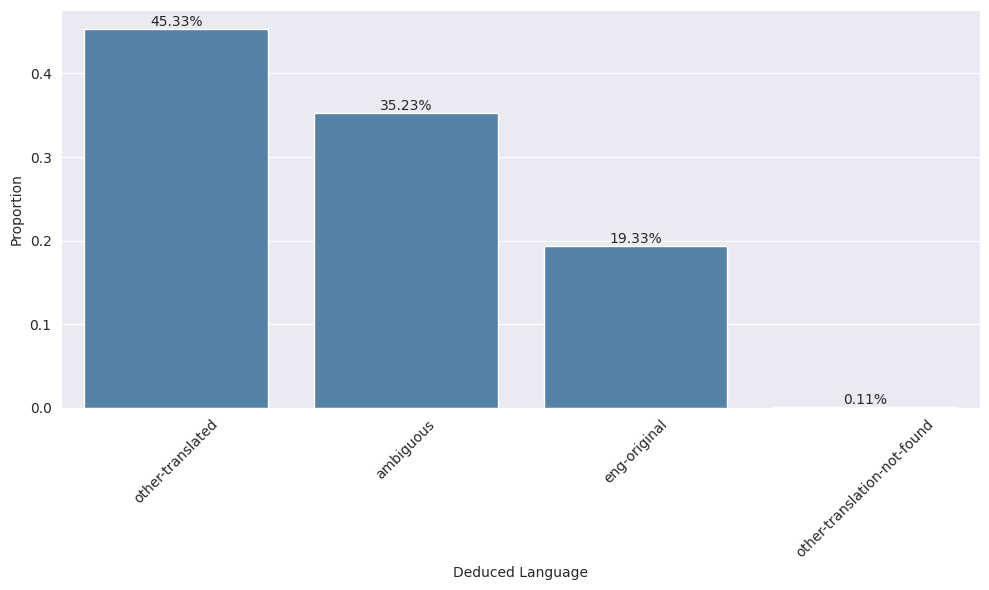

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions
language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Add proportion values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}',  # Convert to percentage format
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()

In [4]:
# users removed that have unknown interactions >= 20 users >= 20 items
unknown_items = gr_ratings_languages_df[gr_ratings_languages_df['deduced_language'] == 'unknown']['item'].unique()

ratings_df = work_ratings_df[~work_ratings_df['item'].isin(unknown_items)]
ratings_df

,user,item,rating,last_rating,first_time,last_time,nratings
0,1,400625995,3.0,3.0,1501432064,1501432064,1
1,1,400033362,4.0,4.0,1495825408,1495825408,1
2,1,400985244,2.0,2.0,1490208512,1490208512,1
3,1,450247128,5.0,5.0,1488877696,1488877696,1
4,1,447250922,4.0,4.0,1482852608,1482852608,1
...,...,...,...,...,...,...,...
104028922,876145,400187844,4.0,4.0,1388936064,1388936064,1
104028923,876145,402049624,4.0,4.0,1382217216,1382217216,1
104028925,876145,404812169,4.0,4.0,1366579328,1366579328,1
104028926,876145,421956106,3.0,3.0,1366579328,1366579328,1


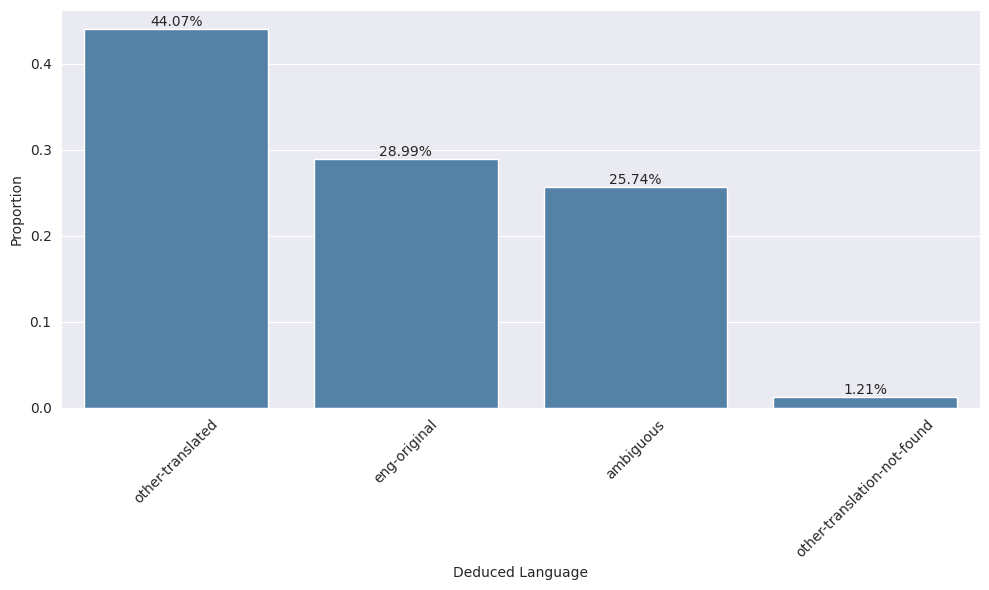

In [12]:
# only unknown interactions removed >= 20 users >= 20 items
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions
language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Add proportion values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}',  # Convert to percentage format
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()

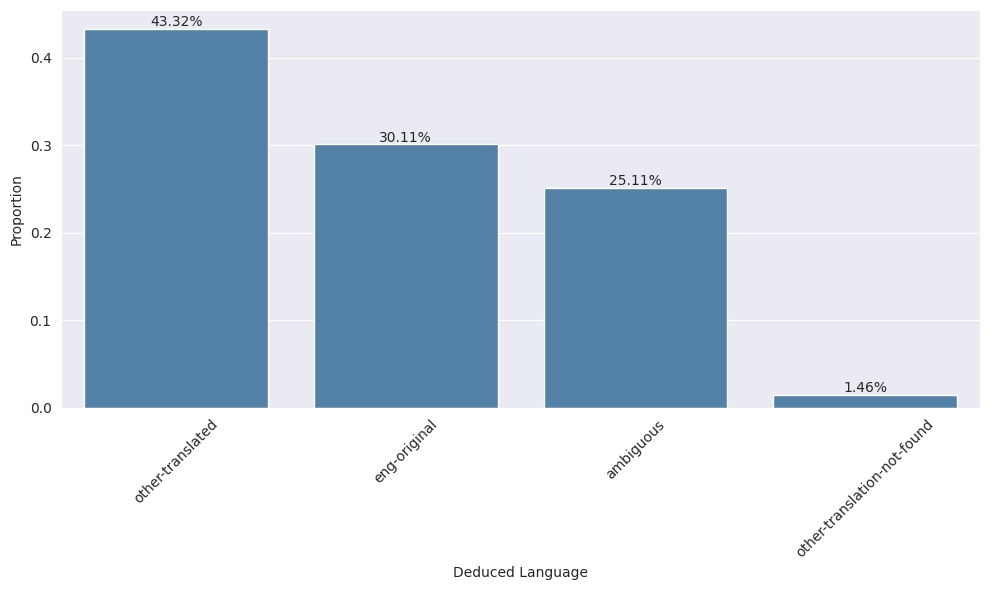

In [9]:
# only unknown interactions removed
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions
language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Add proportion values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}',  # Convert to percentage format
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()

# Sampling

In [7]:
import time

def stratified_user_sample(data, n_users=1000, n_bins=5):
    random_state = int(time.time())
    print(f"Random State is: {random_state}")
    # compute language distribution per user
    user_lang_dist = data.groupby('user')['deduced_language'].value_counts(normalize=True).unstack(fill_value=0)

    # user activity (number of ratings per user)
    user_activity = data.groupby('user').size().reset_index(name='num_ratings')

    # bin users into activity levels
    user_activity['activity_bucket'] = pd.qcut(user_activity['num_ratings'], q=n_bins, labels=False, duplicates='drop')

    # merge user info (activity + language distribution)
    user_info = pd.merge(user_activity, user_lang_dist, on='user')

    # calculate how many users to sample from each bucket (based on original activity distribution)
    activity_dist = user_activity['activity_bucket'].value_counts(normalize=True)
    target_sizes = (activity_dist * n_users).round().astype(int)
    global_language_distribution = data['deduced_language'].value_counts(normalize=True)
    # sample users from each bucket, keeping language distribution intact
    sampled_users = user_info.groupby('activity_bucket', group_keys=False).apply(
        lambda x: x.sample(
            n=min(len(x), target_sizes.loc[x['activity_bucket'].iloc[0]]),
            weights=x.drop(['user', 'num_ratings', 'activity_bucket'], axis=1).dot(global_language_distribution),
            random_state=random_state
        )
    )['user']

    # return original interactions from sampled users
    # return data[data['userId'].isin(sampled_users)]
    return sampled_users


In [29]:
# remove items with less than 20 ratings
item_counts = gr_ratings_languages_df['item'].value_counts()
items_to_keep = item_counts[item_counts >= 20].index
gr_ratings_languages_df = gr_ratings_languages_df[gr_ratings_languages_df['item'].isin(items_to_keep)]
gr_ratings_languages_df

,user,item,rating,deduced_language
0,1,400625995,3,ambiguous
1,1,400033362,4,other-translated
2,1,400985244,2,other-translated
3,1,450247128,5,other-translated
4,1,447250922,4,other-translated
...,...,...,...,...
104028924,876145,403410520,3,unknown
104028925,876145,404812169,4,other-translation-not-found
104028926,876145,421956106,3,other-translation-not-found
104028927,876145,413086736,4,unknown


In [28]:
# keep users with more than 20 ratings
user_counts = gr_ratings_languages_df['user'].value_counts()
filtered_users = user_counts[user_counts >= 20].index
gr_ratings_languages_df = gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(filtered_users)]
gr_ratings_languages_df

,user,item,rating,deduced_language
0,1,400625995,3,ambiguous
1,1,400033362,4,other-translated
2,1,400985244,2,other-translated
3,1,450247128,5,other-translated
4,1,447250922,4,other-translated
...,...,...,...,...
104028924,876145,403410520,3,unknown
104028925,876145,404812169,4,other-translation-not-found
104028926,876145,421956106,3,other-translation-not-found
104028927,876145,413086736,4,unknown


In [5]:
user_sample = stratified_user_sample(gr_ratings_languages_df, 60000, 20)
user_sample

/tmp/ipykernel_3046/58180825.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_users = user_info.groupby('activity_bucket', group_keys=False).apply(


502542    587458
622237    847496
581113    752813
553759    687221
443313    470303
           ...  
289534    298623
294105    303396
123654    127134
49587      50799
270490    278783
Name: user, Length: 59999, dtype: uint32

In [7]:
gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)]

,user,item,rating,deduced_language
0,1,400625995,3,ambiguous
1,1,400033362,4,other-translated
2,1,400985244,2,other-translated
3,1,450247128,5,other-translated
4,1,447250922,4,other-translated
...,...,...,...,...
104028134,876028,406586623,5,unknown
104028135,876028,403800088,4,unknown
104028136,876028,403596896,5,other-translated
104028137,876028,421881449,2,unknown


In [6]:
# only unknown interactions removed >= 20 users >= 20 items
import seaborn as sns
import matplotlib.pyplot as plt

def plot_language_distribution(df):
    # Calculate proportions
    language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

    plt.xlabel('Deduced Language')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)

    # Add proportion values on top of each bar
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2%}',  # Convert to percentage format
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 5),  # Offset from the bar
            textcoords='offset points',
        )

    plt.tight_layout()

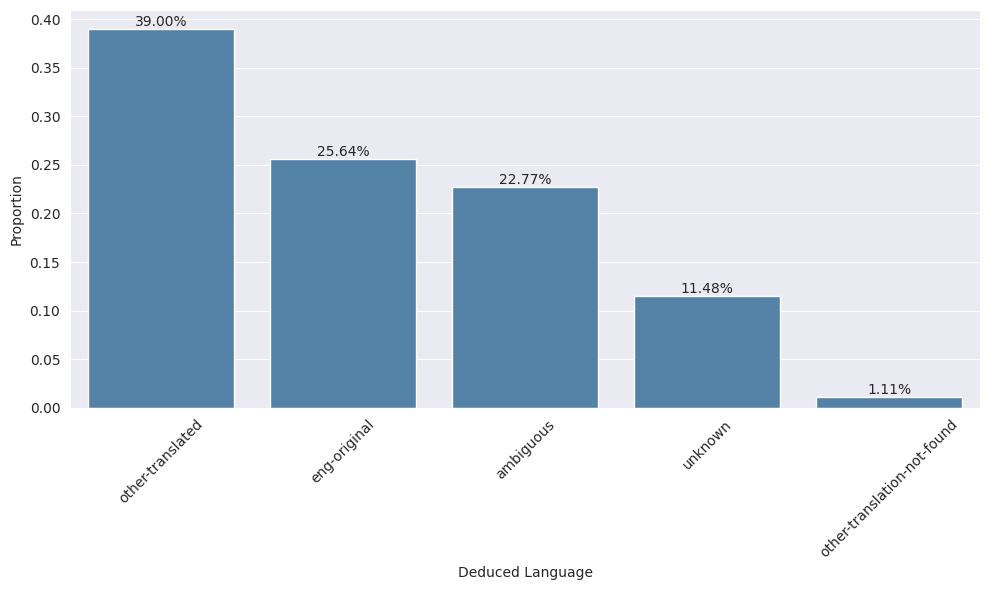

In [12]:
plot_language_distribution(gr_ratings_languages_df)

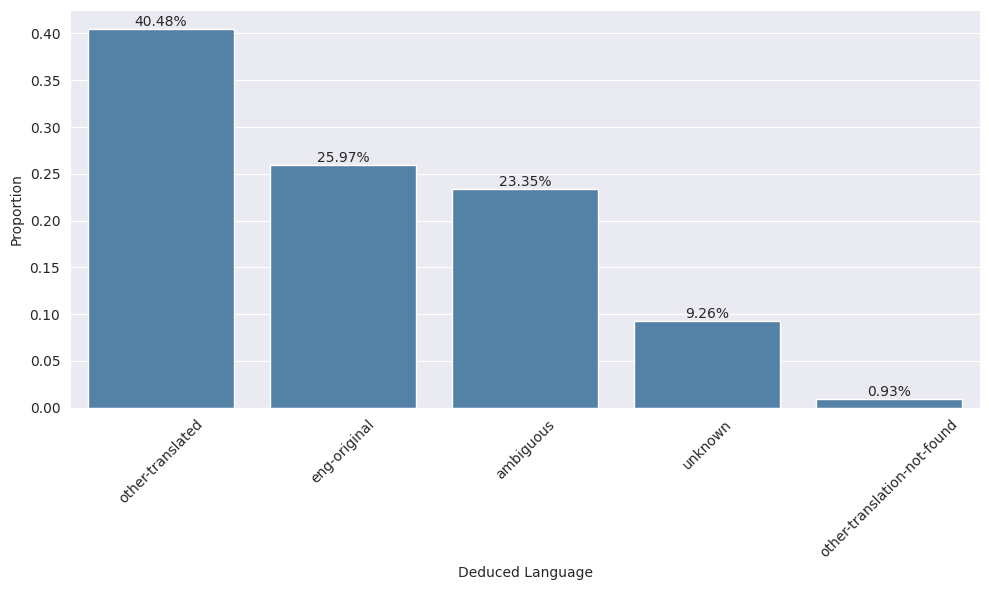

In [13]:
plot_language_distribution(gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_user_activity(original_data, sampled_data):

    original_activity = original_data.groupby('user').size()
    sampled_activity = sampled_data.groupby('user').size()

    plt.figure(figsize=(8, 5))
    #sns.histplot(original_activity, bins=50, color='blue', alpha=0.5, label='Original Data', kde=True)
    sns.histplot(sampled_activity, bins=50, color='orange', alpha=0.5, label='Sampled Data', kde=True)

    plt.xscale('log')  # log scale for better visibility
    plt.xlabel("Number of Ratings per User")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

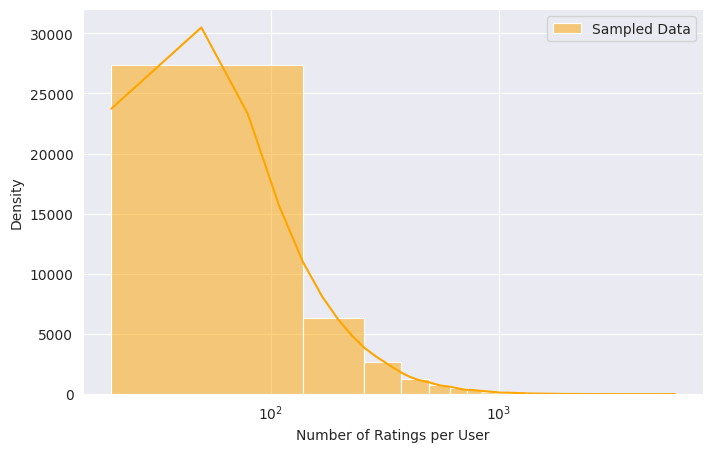

In [19]:
plot_user_activity(gr_ratings_languages_df, gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)])

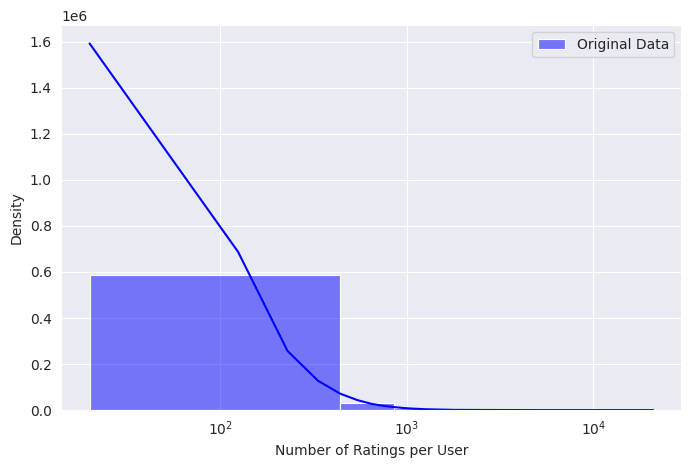

In [21]:
plot_user_activity(gr_ratings_languages_df, gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)])

In [26]:
ratings_df = work_ratings_df[work_ratings_df['user'].isin(user_sample)]
ratings_df

,user,item,rating,last_rating,first_time,last_time,nratings
184,4,406374255,3.0,3.0,1382270080,1382270080,1
185,4,418979356,4.0,4.0,1382270080,1382270080,1
186,4,406996712,3.0,3.0,1361418752,1361418752,1
187,4,403214749,4.0,4.0,1354509568,1354509568,1
188,4,409585076,5.0,5.0,1341885952,1341885952,1
...,...,...,...,...,...,...,...
104028225,876045,403214266,5.0,5.0,1365136640,1365136640,1
104028226,876045,418034963,3.0,3.0,1364809344,1364809344,1
104028227,876045,400122831,5.0,5.0,1364808960,1364808960,1
104028228,876045,400846981,5.0,5.0,1364807680,1364807680,1


# Sample on users with k-core afterwards

In [31]:
user_sample = stratified_user_sample(gr_ratings_languages_df, 20000, 20)

Random State is: 1742991239


/tmp/ipykernel_317448/3323225047.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_users = user_info.groupby('activity_bucket', group_keys=False).apply(


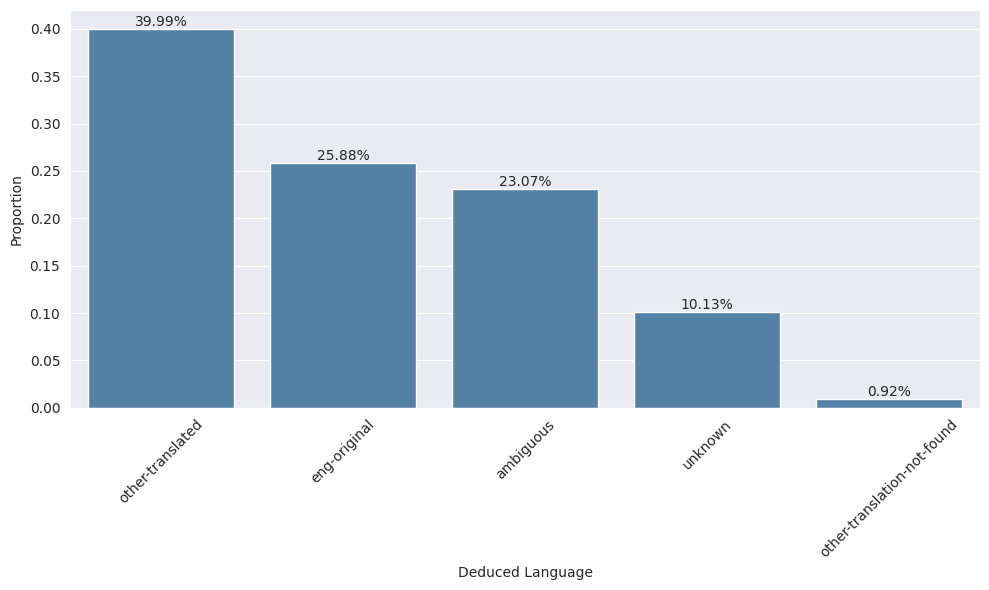

In [30]:
plot_language_distribution(gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)])

In [21]:
sample_df = gr_ratings_languages_df[gr_ratings_languages_df['user'].isin(user_sample)]

In [32]:
# remove items with less than 10 ratings
item_counts = sample_df['item'].value_counts()
items_to_keep = item_counts[item_counts >= 10].index
sample_df = sample_df[sample_df['item'].isin(items_to_keep)]
sample_df

,user,item,rating,deduced_language
4842,105,421801712,2,other-translation-not-found
4844,105,401531161,3,ambiguous
4848,105,401858012,3,ambiguous
4854,105,401112038,3,eng-original
4855,105,402342136,2,ambiguous
...,...,...,...,...
104027980,876010,401708725,5,other-translated
104027981,876010,404259809,5,ambiguous
104027982,876010,402534720,2,other-translated
104027983,876010,402766512,4,ambiguous


In [24]:

# keep users with more than 20 ratings
user_counts = sample_df['user'].value_counts()
filtered_users = user_counts[user_counts >= 20].index
sample_df = sample_df[gr_ratings_languages_df['user'].isin(filtered_users)]
sample_df

/tmp/ipykernel_317448/2742918032.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df = sample_df[gr_ratings_languages_df['user'].isin(filtered_users)]


,user,item,rating,deduced_language
4842,105,421801712,2,other-translation-not-found
4844,105,401531161,3,ambiguous
4848,105,401858012,3,ambiguous
4854,105,401112038,3,eng-original
4855,105,402342136,2,ambiguous
...,...,...,...,...
104027980,876010,401708725,5,other-translated
104027981,876010,404259809,5,ambiguous
104027982,876010,402534720,2,other-translated
104027983,876010,402766512,4,ambiguous


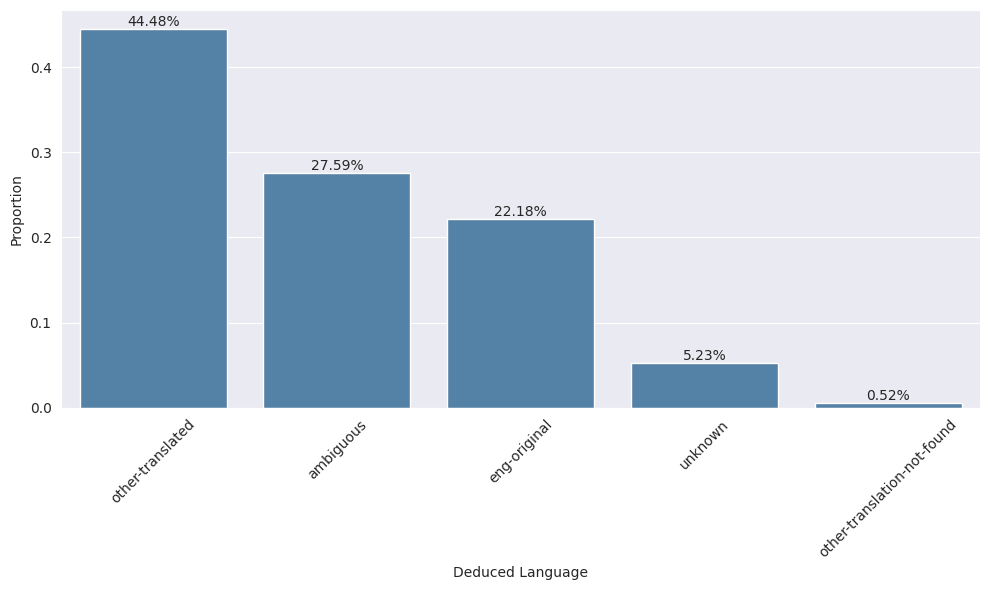

In [33]:
plot_language_distribution(sample_df)

In [34]:
len(sample_df['item'].unique())

43170

In [35]:
len(sample_df['user'].unique())

18827

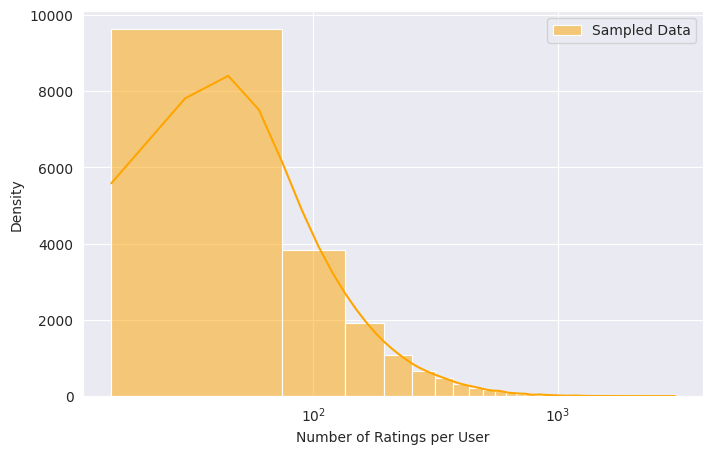

In [36]:
plot_user_activity(sample_df, sample_df)

In [165]:
sample_df.to_parquet("ratings_50000sampled_20users_10items_binary.parquet")

In [39]:
sample_df.to_parquet("ratings_20000sampled_20users_10items_binary.parquet")

In [37]:
len(sample_df)

2433735

# Prepare dataset

In [38]:
duplicates = sample_df.duplicated(subset=['user', 'item'], keep=False)
sum(duplicates)

0

In [3]:
# checkpoint
sampled_df = pd.read_parquet(
    'ratings_20000sampled_20users_10items_binary.parquet',
    engine='pyarrow')
sampled_df

,user,item,rating,deduced_language
4842,105,421801712,2,other-translation-not-found
4844,105,401531161,3,ambiguous
4848,105,401858012,3,ambiguous
4854,105,401112038,3,eng-original
4855,105,402342136,2,ambiguous
...,...,...,...,...
104027980,876010,401708725,5,other-translated
104027981,876010,404259809,5,ambiguous
104027982,876010,402534720,2,other-translated
104027983,876010,402766512,4,ambiguous


In [4]:
work_ratings_df[work_ratings_df['user'].isin(sampled_df['user'])]

,user,item,rating,last_rating,first_time,last_time,nratings
4813,105,457747521,4.0,4.0,1508107648,1508107648,1
4814,105,457857791,5.0,5.0,1507299840,1507299840,1
4815,105,456367578,4.0,4.0,1498700800,1498700800,1
4816,105,413448243,3.0,3.0,1496513024,1496513024,1
4817,105,453779580,4.0,4.0,1485567744,1485567744,1
...,...,...,...,...,...,...,...
104027980,876010,401708725,5.0,5.0,1338798080,1338798080,1
104027981,876010,404259809,5.0,5.0,1338798080,1338798080,1
104027982,876010,402534720,2.0,2.0,1338797952,1338797952,1
104027983,876010,402766512,4.0,4.0,1338797952,1338797952,1


In [5]:
duplicates = work_ratings_df[work_ratings_df['user'].isin(sampled_df['user'])].duplicated(subset=['user', 'item'], keep=False)
sum(duplicates)

0

In [6]:
sampled_df = sampled_df.merge(work_ratings_df[['user', 'item', 'last_rating','last_time']], on=['user', 'item'], how='left')

In [7]:
sampled_df = sampled_df[['user', 'item', 'last_rating','last_time']]
sampled_df
# convert ratings to binary
sampled_df['last_rating'] = (sampled_df['last_rating'] >= 3).astype(int)
sampled_df

,user,item,last_rating,last_time
0,105,421801712,0,1407183360
1,105,401531161,1,1396309376
2,105,401858012,1,1387229568
3,105,401112038,1,1422220672
4,105,402342136,0,1366710528
...,...,...,...,...
2433730,876010,401708725,1,1338798080
2433731,876010,404259809,1,1338798080
2433732,876010,402534720,0,1338797952
2433733,876010,402766512,1,1338797952


In [8]:
# split 80% - 20%
train_data = []
val_data = []
test_data = []
count = 0
for user, user_df in sampled_df.groupby('user'):
    count += 1
    user_df = user_df.sort_values(by='last_time')

    train_idx = int(len(user_df) * 0.6)
    val_idx = int(len(user_df) * 0.8)

    train_data.append(user_df.iloc[:train_idx])  # oldest 60%
    val_data.append(user_df.iloc[train_idx:val_idx])
    test_data.append(user_df.iloc[val_idx:])  # newest 20%
    if count % 10000 == 0:
        print(f"Parsed {count} users")

train_df = pd.concat(train_data)
print(train_df)
valid_df = pd.concat(val_data)
print(valid_df)
test_df = pd.concat(test_data)
print(test_df)

Parsed 10000 users
           user       item  last_rating   last_time
1825422     105  404640799            1  1338893184
22          105  404790821            1  1338893312
1217542     105  403204327            1  1338893312
1217541     105  403178011            1  1338893440
1217539     105  404835472            1  1338893696
...         ...        ...          ...         ...
2433727  876010  402561472            1  1338798208
2433728  876010  401499998            1  1338798208
1825382  876010  402956680            1  1338798208
1825380  876010  400854886            1  1338798720
1217509  876010  413105229            1  1338798848

[1452684 rows x 4 columns]
           user       item  last_rating   last_time
1825399     105  400678243            1  1368621184
1825397     105  403252320            1  1368621312
608100      105  403057979            0  1368621312
608099      105  403098166            0  1368621312
608101      105  403183592            1  1368621312
...         ...  

In [9]:
# save data sets as is
train_df.to_csv("ratings_20000sampled_20users_10items_split/train_dataset_separated.tsv", sep='\t', index=False,
                header=False)
valid_df.to_csv("ratings_20000sampled_20users_10items_split/validation_dataset.tsv", sep='\t', index=False,
                header=False)
test_df.to_csv("ratings_20000sampled_20users_10items_split/test_dataset.tsv", sep='\t', index=False, header=False)
# save complete test set
valid_df.to_csv("ratings_20000sampled_20users_10items_split/train_dataset.tsv", sep='\t', index=False, header=False)
train_df.to_csv("ratings_20000sampled_20users_10items_split/train_dataset.tsv", sep='\t', index=False, header=False,
                mode='a')

In [11]:
print(f"Transactions: {len(sampled_df)}")
print(f"Users: {len(sampled_df['user'].unique())}")
print(f"Items: {len(sampled_df['item'].unique())}")

Transactions: 2433735
Users: 18827
Items: 43170
